## Neural Network Prediction of Sea Level Rise Based on Greenhouse Gas Emissions

* **Course:** Foundations of Machine Learning: Theory and Practice (SoSe 2025)
* **Instructor:** Prof. Dr. Elia Bruni
* **Students:**
    * Johanna Pilz - 985733
    * Martin Iribarren Tortone - 1011094
* **Submission Date:** 22.08.2025

---

## Notebook Description

This notebook investigates and consolidates available data sources and the possibility to combine and extrapolate them into continous data. It focuses on identifying sources of historical greenhouse gas (GHG) emissions, future emission scenarios, and sea level data.

## Introduction: Predicting Sea Level Rise with Machine Learning

Global sea level rise is one of the most significant consequences of climate change, posing a critical threat to coastal communities and ecosystems worldwide. As illustrated in figure below, the primary driver of this rise is the increasing concentration of greenhouse gases (GHGs) in the atmosphere, resulting from human activities. These gases trap heat, warming the planet and causing both thermal expansion of ocean water and the melting of land ice and glaciers.

This project explores the relationship between GHG emissions and sea level change using machine learning techniques. We aim to develop a simple predictive model capable of forecasting future sea level rise based on different GHG emission scenarios.

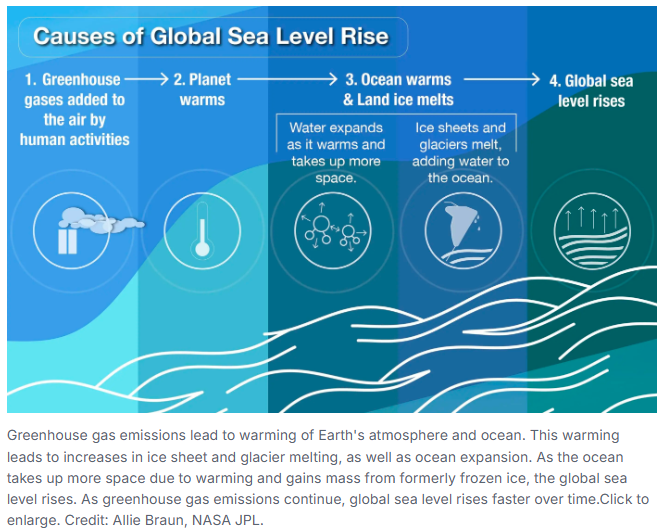

In [2]:
from IPython.display import Image
Image(filename='images/cgslr.png')

## Data exploration

The first step in this project involved a comprehensive search for available datasets pertaining to historical greenhouse gas emissions, future emission predictions, and past sea level rise observations. This exploration led to the compilation of multiple data sources, requiring the consideration of time resolutions and potential inconsistencies to create a cohesive dataset suitable for machine learning analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

### Past Greenhouse Gas emissions and Predictions

##### Source: PCC, 2024. IPCC AR6 Synthesis Report LR Figure 2.5 (a): Global GHG emissions of modelled pathways. Palisades, New York: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/gadr-8q65   Titel anhand dieser DOI in Citavi-Projekt übernehmen. Accessed DAY MONTH YEAR

In [4]:
# Read the data file
df_pred_raw = pd.read_excel("../data/AR6-SYR-LR-F2-5-Panel(a).xlsx", sheet_name="Data")

# Transform the data frame
df_pred = df_pred_raw.drop([1,2,3,4,6,7,8,10,11,13,14,16])
df_pred = df_pred.drop(['Unnamed: 1',2019], axis=1)
years_past = np.array(df_pred.columns[1:7])
years_pred = np.array(df_pred.columns[6:])

# Extract the past emisission and different future scenarios
GHG_past = df_pred.iloc[[0]].values[0,1:7]
GHG_pred_trend = df_pred.iloc[[1]].values[0,6:]
GHG_pred_15_over = df_pred.iloc[[2]].values[0,6:]
GHG_pred_2 = df_pred.iloc[[3]].values[0,6:]
GHG_pred_15 = df_pred.iloc[[4]].values[0,6:]

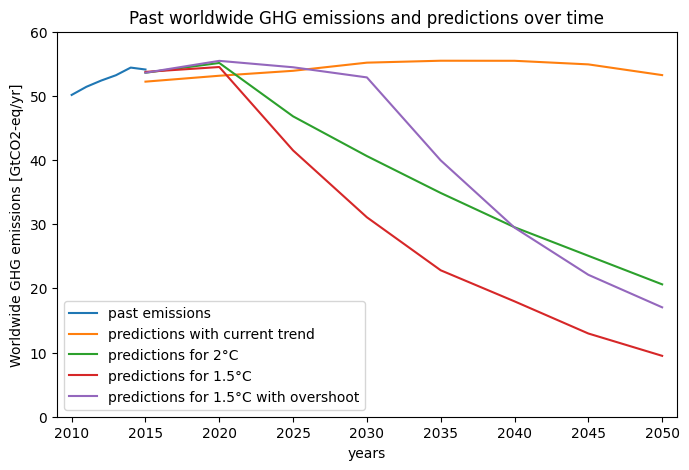

In [5]:
# Plot Past GHG emissions and predictions
fig=plt.figure(figsize = (8,5))
ax1=fig.add_subplot(111)
ax1.plot(years_past,GHG_past, label = "past emissions")
ax1.plot(years_pred,GHG_pred_trend, label = "predictions with current trend")
ax1.plot(years_pred,GHG_pred_2, label = "predictions for 2°C")
ax1.plot(years_pred,GHG_pred_15, label = "predictions for 1.5°C")
ax1.plot(years_pred,GHG_pred_15_over, label = "predictions for 1.5°C with overshoot")
ax1.set_title(r'Past worldwide GHG emissions and predictions over time')
ax1.legend()
ax1.set_xlabel('years')
ax1.set_ylabel('Worldwide GHG emissions [GtCO2-eq/yr]')
ax1.axis([2009, 2051, 0, 60])
fig.savefig('images/data_projections.png')

### Past Greenhouse Gas Emissions

##### Source 1: The first source is included in the data for the predictions of different greenhouse gas scenarios (see above).

##### Source 2: IPCC, 2025. IPCC AR6 Synthesis Report LR Figure 2.2 (c): Global net anthropogenic GHG emissions by region (1990-2019). Palisades, New York: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/486h-bt03  Titel anhand dieser DOI in Citavi-Projekt übernehmen. Accessed DAY MONTH YEAR.

In [6]:
# Read the data file
df_past_GHG = pd.read_excel("../data/AR6-SYR-LR-F2-2-Panel(c).xlsx", sheet_name="GHG emisions (GtCO2 eq per yr) ")

# Transform the dataframe
df_past_GHG = df_past_GHG.groupby('Year').sum()
df_past_GHG = df_past_GHG.drop('Region', axis=1)

##### Source 3: Jones, Matthew W.; Peters, Glen P.; Gasser, Thomas; Andrew, Robbie M.; Schwingshackl, Clemens; Gütschow, Johannes et al. (2024): National contributions to climate change due to historical emissions of carbon dioxide, methane and nitrous oxide.

In [7]:
# Fetch the data
df_past_GHG2 = pd.read_csv("https://ourworldindata.org/grapher/total-ghg-emissions.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Transform the dataframe
df_past_GHG2 = df_past_GHG2.loc[df_past_GHG2['Entity'] == 'World']
df_past_GHG2 = df_past_GHG2.drop(['Entity','Code'], axis=1)
df_past_GHG2 = df_past_GHG2.set_index('Year')

# Adjust the emission unit
df_past_GHG2.annual_emissions_ghg_total_co2eq *= 10**(-9)

To establish a robust historical baseline, we evaluated two datasets containing past greenhouse gas (GHG) emissions, assessing the length of time each dataset covers and their consistency. A key aspect of this comparison involved examining the compatibility of each historical dataset with the future emission scenario dataset, specifically focusing on overlapping time periods and consistency in reported emission units.

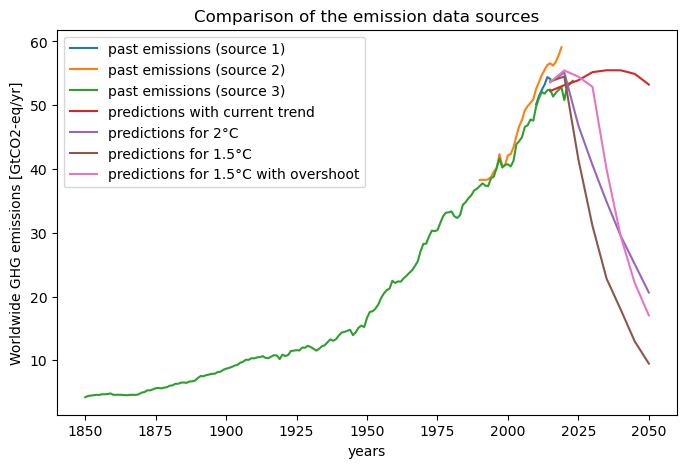

In [19]:
# Comparison of the three emission data sources
fig=plt.figure(figsize = (8,5))
ax1=fig.add_subplot(111)
ax1.plot(years_past,GHG_past, label = "past emissions (source 1)")
ax1.plot(df_past_GHG, label = "past emissions (source 2)")
ax1.plot(df_past_GHG2, label = "past emissions (source 3)")
ax1.plot(years_pred,GHG_pred_trend, label = "predictions with current trend")
ax1.plot(years_pred,GHG_pred_2, label = "predictions for 2°C")
ax1.plot(years_pred,GHG_pred_15, label = "predictions for 1.5°C")
ax1.plot(years_pred,GHG_pred_15_over, label = "predictions for 1.5°C with overshoot")
ax1.set_title(r'Comparison of the emission data sources')
ax1.legend()
ax1.set_xlabel('years')
ax1.set_ylabel('Worldwide GHG emissions [GtCO2-eq/yr]')
fig.savefig('images/comparison_past_emissions.png')

The comparison of historical GHG emission data from three sources (as visualized in the figure) reveals a stronger alignment with both historical trends and future emission scenarios derived from Source 1. Furthermore, Source 3 provides a significantly longer historical record of emissions compared to Source 2. Therefore, we will proceed using data from Source 3 for the remainder of the analysis and discontinue use of data from Source 2.

##### Years of overlap: 
To seamlessly combine the historical emission data from Sources 1 and 3, we are identifying the year where the difference between their reported emissions is minimized. This approach aims to find the optimal point to join the datasets, creating a smooth and consistent historical record for our analysis.

In [11]:
print("--------------------------------------------------------------")
print("Years of overlap:")
print("--------------------------------------------------------------")
print(f"{'Year':<15} {'Source 1':<15} {'Source 3':<15} {'Difference':<15}")
print("--------------------------------------------------------------")
for i,y in enumerate(years_past):
    emission3 = df_past_GHG2.loc[[y]].annual_emissions_ghg_total_co2eq.iloc[0]
    print(f"{y:<15} {GHG_past[i]:<15.2f} {emission3:<15.4} {emission3-GHG_past[i]:<15.2}")
print("--------------------------------------------------------------")

--------------------------------------------------------------
Years of overlap:
--------------------------------------------------------------
Year            Source 1        Source 3        Difference     
--------------------------------------------------------------
2010            50.15           49.8            -0.35          
2011            51.42           51.09           -0.33          
2012            52.39           52.09           -0.3           
2013            53.22           51.81           -1.4           
2014            54.41           52.36           -2.1           
2015            54.11           52.44           -1.7           
--------------------------------------------------------------


As shown in the table above, the analysis identified 2012 as the year with the smallest difference in reported emissions between Sources 1 and 3. Consequently, we will construct a combined historical dataset by utilizing data from Source 3 up to and including 2011, and then transitioning to data from Source 1 from 2012 onwards.

In [9]:
# Combine historical data sources
GHG_past_comb = df_past_GHG2.copy()
GHG_past_comb.loc[[2012, 2013, 2014], 'annual_emissions_ghg_total_co2eq'] = [float(emi) for emi in GHG_past[2:5]]
del_years = np.arange(2015,2024)
GHG_past_comb = GHG_past_comb.drop(del_years)

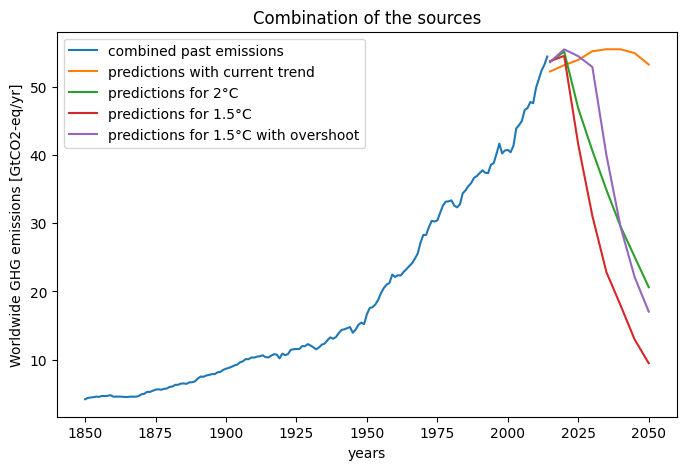

In [10]:
# Plot the combined GHG emissions
fig=plt.figure(figsize = (8,5))
ax1=fig.add_subplot(111)
ax1.plot(GHG_past_comb, label = "combined past emissions")
ax1.plot(years_pred,GHG_pred_trend, label = "predictions with current trend")
ax1.plot(years_pred,GHG_pred_2, label = "predictions for 2°C")
ax1.plot(years_pred,GHG_pred_15, label = "predictions for 1.5°C")
ax1.plot(years_pred,GHG_pred_15_over, label = "predictions for 1.5°C with overshoot")
ax1.set_title(r'Combination of the sources')
ax1.legend()
ax1.set_xlabel('years')
ax1.set_ylabel('Worldwide GHG emissions [GtCO2-eq/yr]')
fig.savefig('images/data_combined_emissions.png')

The figure above illustrates our combined dataset of historical and projected GHG emissions. While the historical data is available at yearly intervals, the future emission scenarios are provided only every 5 years. Therefore, during data preparation, the future GHG emission scenarios will be interpolated to match the yearly frequency of the historical data.

### Sea level rise

##### Source: NOAA Climate.gov (2022) Global Sea Level. with  University of Hawaii Fast Delivery sea level data

In [ ]:
# Fetch the data
df_sealevel = pd.read_csv("https://ourworldindata.org/grapher/sea-level.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Transform the dataframe
df_sealevel = df_sealevel.drop(['Entity','Code','sea_level_church_and_white_2011','sea_level_average'], axis=1)
df_sealevel = df_sealevel.dropna()
df_sealevel['Day'] = [np.datetime64(day) for day in df_sealevel['Day']]

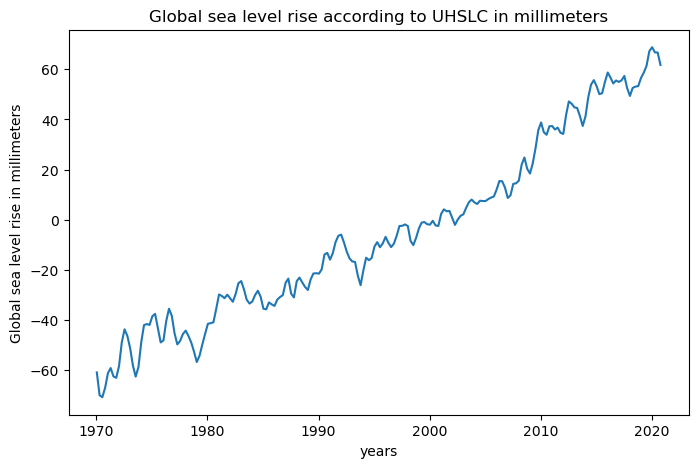

In [17]:
# Plot the Sea level rise
fig=plt.figure(figsize = (8,5))
ax1=fig.add_subplot(111)
ax1.plot(df_sealevel['Day'],df_sealevel['sea_level_uhslc'])
ax1.set_title(r'Global sea level rise according to UHSLC in millimeters')
ax1.set_xlabel('years')
ax1.set_ylabel('Global sea level rise in millimeters')
fig.savefig('images/data_sealevelrise.png')